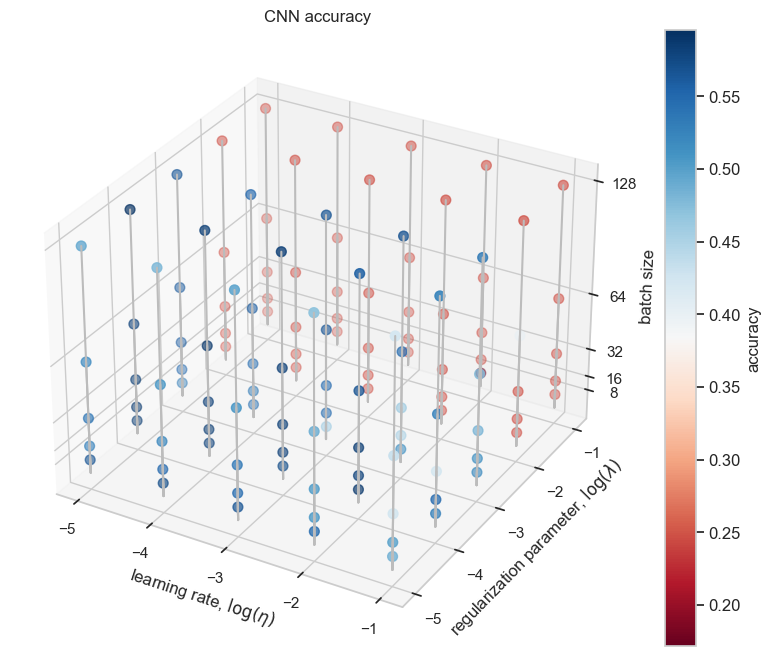

In [37]:
# will change color points to non see through and change the distance between batch sizes to be equal
# and smaller colorbar


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D


data = np.load("gridsearch_score_data/CNN_score_accuracy.npy")
# parameters (in order as below): learning rate, regularization parameter, batch size, accuracy
eta = np.log10(data[:,0])
lmb = np.log10(data[:,1])
batch_size = data[:,2]
accuracy = data[:,3]

# getting examined paramter values for axis ticks
eta_val = set(eta)
lmb_val = set(lmb)
batch_val = set(batch_size)
eta_val = np.array(list(eta_val))
lmb_val = np.array(list(lmb_val))
batch_val = np.array(list(batch_val))


#sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_theme(style="white")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(eta, lmb, batch_size, c=accuracy, s=50, cmap='RdBu')
ax.set_title("CNN accuracy")
ax.set_xlabel(r"learning rate, $\log(\eta)$")
ax.set_ylabel(r"regularization parameter, $\log(\lambda)$")
ax.set_zlabel("batch size")
ax.xaxis.set_ticks(eta_val)
ax.yaxis.set_ticks(lmb_val)
ax.zaxis.set_ticks(batch_val)


#colorbar
[vmin, vmax] = [accuracy.min(), accuracy.max()]
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap='RdBu'),
            ax=ax, orientation='vertical', label='accuracy')
cbar.ax.tick_params(labelsize=12)

#lines
for i,j,k,h in zip(eta, lmb, batch_size, accuracy):
    ax.plot([i,i],[j,j],[k,h], color="#bcbcbc")



# save figure
plt.savefig("gridsearch_accuracy")
plt.close()



#duplicate for loss

